In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [16]:
def imshow(raw_pic):
    modified = cv2.cvtColor(raw_pic,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12,14))
    return plt.imshow(modified)

In [17]:
path_image = './Images/solidYellowCurve2.jpg'
image = cv2.imread(path_image)
path_detection_image = np.copy(image)

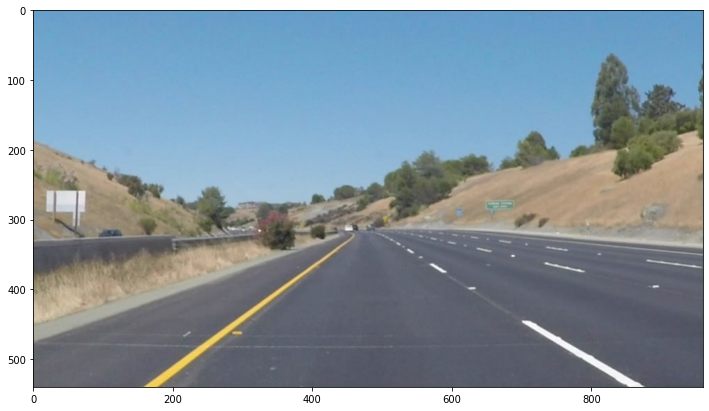

In [18]:
imshow(image)

In [19]:
def find_coordinates(image, line_parameters):

    slope, intercept = line_parameters
        
    y1 = image.shape[0]
    y2 = int(y1*(3/5))
    x1 = int((y1-intercept)/slope)
    x2 = int((y2-intercept)/slope)
    return np.array([x1,y1,x2,y2])


In [20]:
def slope_intercept(image,lines):
    left = []
    right = []

    for line in lines:
        x1,y1,x2,y2 = line.reshape(4)
        parameters = np.polyfit((x1,x2),(y1,y2),1)
        slope = parameters[0]
        intercept = parameters[1]
        if slope<0:
            left.append((slope,intercept))
        else:
            right.append((slope,intercept))
            
    left_fit_average = np.average(left,axis=0)
    right_fit_average = np.average(right,axis=0)
    left_line = find_coordinates(image,left_fit_average)
    right_line = find_coordinates(image,right_fit_average)

    return np.array([left_line,right_line])

In [21]:
def canny_edge(image):
    gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    canny = cv2.Canny(gray_img,50,150)
    return canny

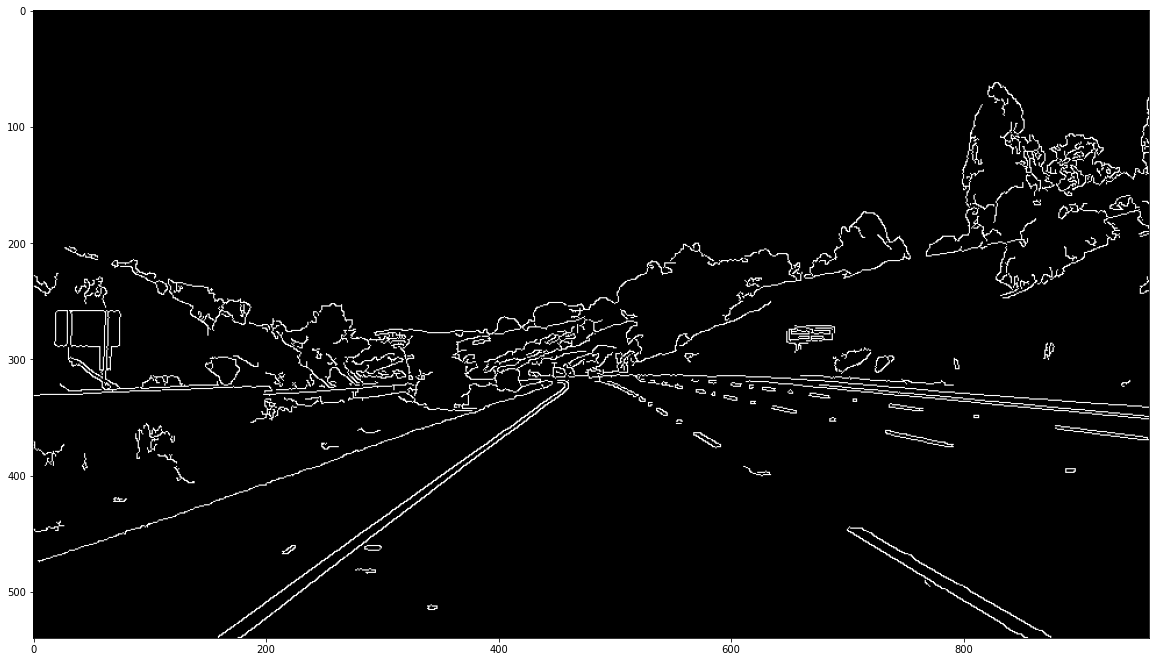

In [22]:
canny = canny_edge(path_detection_image)
plt.figure(figsize=(20,15))
plt.imshow(canny, cmap='gray')

In [23]:
def display(image,lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1,y1,x2,y2 = line.reshape(4)
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
    return line_image
        

In [24]:
def determine_region(image):
    height = image.shape[0]
    width = image.shape[1]
    
    extracted_points = np.array([[(0, height), (width/2, height/2), (width, height)]]).astype('int32')
    
    mask = np.zeros_like(image)
    
    cv2.fillPoly(mask, extracted_points, 255)
    
    masked_image = cv2.bitwise_and(image, mask)

    return masked_image

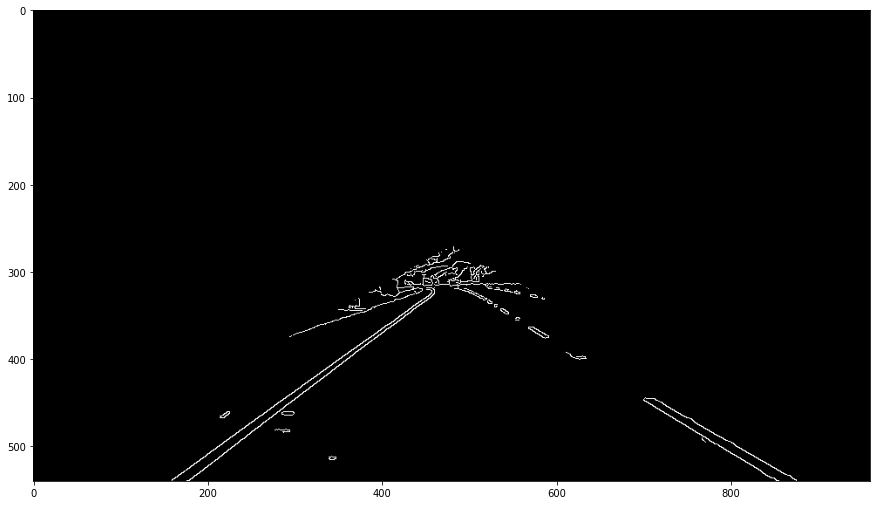

In [25]:
plt.figure(figsize=(15,12))
plt.imshow(determine_region(canny), cmap='gray')

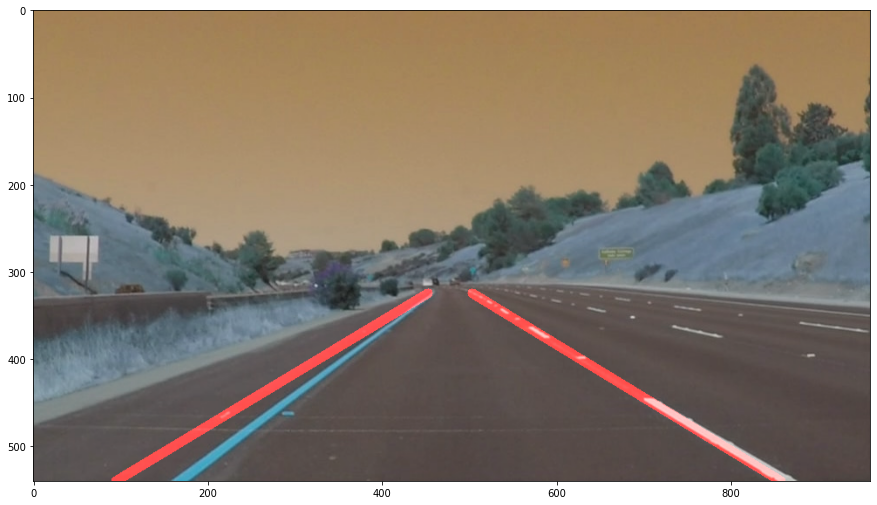

In [26]:
cannys = determine_region(canny)

lines = cv2.HoughLinesP(cannys,2,np.pi/180,100,np.array([]), minLineLength = 40, maxLineGap = 25)

averaged_lines = slope_intercept(path_detection_image,lines)

line_image = display(path_detection_image,averaged_lines)

combo_image = cv2.addWeighted(path_detection_image,0.8,line_image,1,1)

plt.figure(figsize=(15,12))
plt.imshow(combo_image)

In [27]:
path_videos = './test_videos/challenge.mp4'

cap = cv2.VideoCapture(path_videos)
while(cap.isOpened()):
    ret,frame = cap.read()
    if path_videos == './test_videos/challenge.mp4':
        cv2.resize(frame,(500,900))
        my_canny = cv2.Canny(frame,100,150)
        cannys = determine_region(my_canny)
        lines = cv2.HoughLinesP(cannys,2,np.pi/180,100,np.array([]),minLineLength = 40, maxLineGap = 25)
        averaged_lines = slope_intercept(frame, lines)
        line_image = display(frame, averaged_lines)
        combo_image = cv2.addWeighted(frame,0.8,line_image,1,1)
        cv2.imshow("image",combo_image)
        if cv2.waitKey(25) & 0xFF == ord("q"):
            break
    else:
        my_canny = cv2.Canny(frame,100,150)
        cannys = determine_region(my_canny)
        lines = cv2.HoughLinesP(cannys,2,np.pi/180,100,np.array([]),minLineLength = 40, maxLineGap = 25)
        averaged_lines = slope_intercept(frame, lines)
        line_image = display(frame, averaged_lines)
        combo_image = cv2.addWeighted(frame,0.8,line_image,1,1)
        cv2.imshow("image",combo_image)
        if cv2.waitKey(25) & 0xFF == ord("q"):
            break

cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
